# Part B: Simple Linear Regression & Multiple Linear Regression

### By: Madhumitha (Maddie) Ananda Subramanian, Warisara Lee

When observing the data set we see that this is the head of data set.

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt

fPath = r'C:\Users\maddi\Downloads\Admission_Predict_Ver1.1_small_data_set_for_Linear_Regression.csv'
df = pd.read_csv(fPath)

print(df.head())
dfMB = df

   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65  


## Simple Linear Regression

### Dataset Observations

Through using describe dfMB, we can see that the count, mean, standard deviation, min, and percentiles are visible. This then categorizes the dataset.

In [2]:
dfMB.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


## Preproccessing

### Dropping Columns

For this specific dataset, we thought it would be fine to drop the Research column as it doesn't play a major role in finding the average percentile in acceptance. 

In [3]:
dfMB.drop(['Research'], axis=1)
dfMB.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
missing_values = dfMB.isna().sum()
print(missing_values)

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


### Normalizing

This is where we normalize the data and check to see if there are any outliers that we must eliminate.

In [5]:
normal_df = (dfMB - dfMB.mean())/dfMB.std()

normal_df = normal_df.loc[((normal_df > -3).sum(axis=1)==6) & ((normal_df <= 3).sum(axis=1)==6)]

print('Entries before outliers = %d' % (dfMB.shape[0]))
print('Entries after outliers = %d' % (normal_df.shape[0]))

Entries before outliers = 500
Entries after outliers = 0


## Scatter Plot

In this segment, we chose to make a scatter plot for the data set. 

In [6]:
print(normal_df.columns)

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')


The scatterplot's X axis is: Chance of Admit and the Y axis is GRE Score. The goal of this scatter plot is to see if we can find the Chance of Admit vs GRE Score

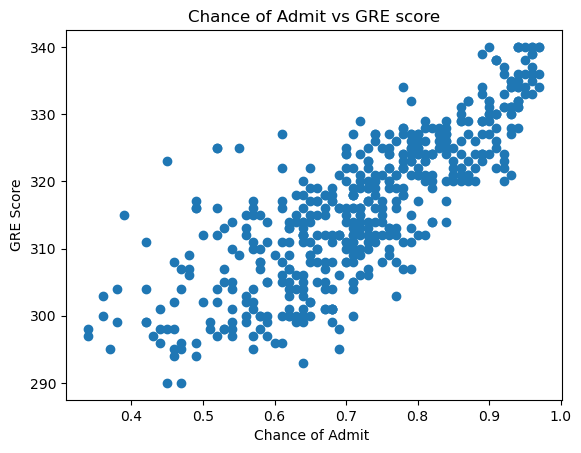

In [7]:
plt.scatter(dfMB['Chance of Admit '], dfMB['GRE Score'])
plt.title('Chance of Admit vs GRE score')
plt.xlabel('Chance of Admit ')
plt.ylabel('GRE Score')
plt.show()

## Ensuring Extrapolated Data in Testing

### Finding Minimum Chance of Admit versus Maximum Chance of Admit

Through this we can see what is the lowest versus highest chance of admitance in our dataset

In [8]:
min_chance_admit = dfMB['Chance of Admit '].idxmin()
max_chance_admit = dfMB['Chance of Admit '].idxmax()

min_row = dfMB.loc[[min_chance_admit]]
max_row = dfMB.loc[[max_chance_admit]]

no_minmax_df = dfMB.drop(index=min_chance_admit)
no_minmax_df = dfMB.drop(index=max_chance_admit)

print("Row with minimum chance of admit:")
print(min_row)

print("\nRow with maximum chance of admit:")
print(max_row)

Row with minimum chance of admit:
    Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
92          93        298           98                  2  4.0   3.0  8.03   

    Research  Chance of Admit   
92         0              0.34  

Row with maximum chance of admit:
    Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
24          25        336          119                  5  4.0   3.5   9.8   

    Research  Chance of Admit   
24         1              0.97  


### Splitting Into Training & Testing Data

We then can split the dataset for testing

In [9]:
from sklearn.model_selection import train_test_split

X = no_minmax_df[['Chance of Admit ']]
y = no_minmax_df['GRE Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Adding Test Data Outside of Training Range

We then can add any outside data from the training range

In [10]:
min_x = min_row['Chance of Admit '].iloc[0]
min_y = min_row['GRE Score'].iloc[0]

max_x = max_row['Chance of Admit '].iloc[0]
max_y = max_row['GRE Score'].iloc[0]

extrapolated_x = pd.DataFrame({'Chance of Admit ': [min_x, max_x]})
extrapolated_y = pd.Series([min_y, max_y])

X_test = pd.concat([X_test, extrapolated_x], ignore_index=True)
y_test = pd.concat([y_test, extrapolated_y], ignore_index=True)

### Apply Linear Regression Model

After this we can apply the linear regression model for the testing

In [11]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred_train = regressor.predict(X_train)
y_pred_test = regressor.predict(X_test)

## Scatter Plot & Regression Line (Training Data)

This is the data that we have when we train the data

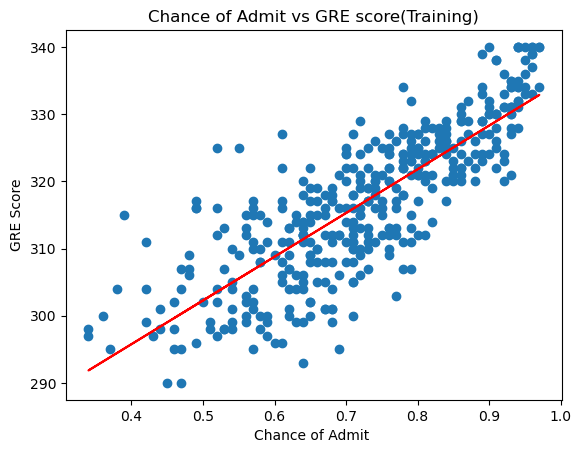

In [12]:
plt.scatter(X_train, y_train)
plt.plot(X_train, y_pred_train, color="red")
plt.title('Chance of Admit vs GRE score(Training)')
plt.xlabel('Chance of Admit ')
plt.ylabel('GRE Score')
plt.show()

## Scatter Plot & Regression Line (Testing Data)

This is the data that we have when we test the data

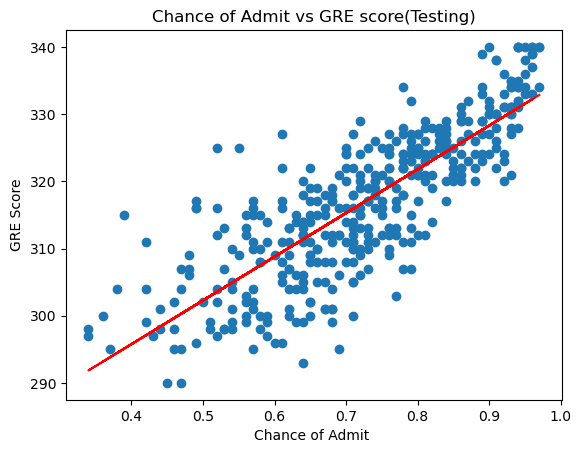

In [13]:
plt.scatter(X_train, y_train)
plt.plot(X_test, y_pred_test, color="red")
plt.title('Chance of Admit vs GRE score(Testing)')
plt.xlabel('Chance of Admit ')
plt.ylabel('GRE Score')
plt.show()

## Extrapolation Predictions

The following is predictions of the extrapolation

In [14]:
print('Extrapolating a number larger than the range')
print(f'Given x value: {X_test.iloc[-2]}')
print(f'Actual y value: {y_test.iloc[-2]}')
print(f'Predicted y value: {y_pred_test[-2]}')
print(f'Residual: {y_test.iloc[-2] - y_pred_test[-2]}')

Extrapolating a number larger than the range
Given x value: Chance of Admit     0.34
Name: 100, dtype: float64
Actual y value: 298
Predicted y value: 291.8571647860407
Residual: 6.142835213959302


In [15]:
print('Extrapolating a number smaller than the range')
print(f'Given x value: {X_test.iloc[-1]}')
print(f'Actual y value: {y_test.iloc[-1]}')
print(f'Predicted y value: {y_pred_test[-1]}')
print(f'Residual: {y_test.iloc[-1] - y_pred_test[-1]}')

Extrapolating a number smaller than the range
Given x value: Chance of Admit     0.97
Name: 101, dtype: float64
Actual y value: 336
Predicted y value: 332.8609628738498
Residual: 3.1390371261501855


## Evaluate Simple Linear Regression

This is the evaluation of the Simple Linear Regression that we performed

In [16]:
from sklearn.metrics import mean_squared_error

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print(f'Training set MSE = {mse_train}')
print(f'Testing set MSE = {mse_test}')

Training set MSE = 41.84996323450346
Testing set MSE = 51.21761849681351


### Conclusion

## Multiple Linear Regression

This is the Multiple Linear Regression model

In [17]:
import statsmodels.api as sm

X = dfMB[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']]
y = dfMB['Chance of Admit ']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     324.4
Date:                Thu, 04 Apr 2024   Prob (F-statistic):          8.21e-180
Time:                        16:30:57   Log-Likelihood:                 701.38
No. Observations:                 500   AIC:                            -1387.
Df Residuals:                     492   BIC:                            -1353.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.2757      0.10

# Classification

The second part of part B:

Rule 1:
If GRE Score > 317.50 and CGPA <= 9.08:
Class = low
Interpretation: Applicants with a GRE score greater than 317.50 but a CGPA less than or equal to 9.08 are likely to have a 'low' chance of admission.

Rule 2:
If GRE Score > 317.50 and CGPA > 9.08 and University Rating <= 3.50:
Class = medium
Interpretation: Applicants with a GRE score greater than 317.50, a CGPA greater than 9.08, and a university rating less than or equal to 3.50 are likely to have a 'medium' chance of admission.

Rule 3:
If GRE Score > 317.50 and CGPA > 9.08 and University Rating > 3.50 and SOP <= 3.50:
Class = high
Interpretation: This rule suggests that applicants with a GRE score greater than 317.50, a CGPA greater than 3.50, and an SOP score less than or equal to 3.50 are likely to have a 'high' chance of admission.

These rules help us narrow margin and gives us a low, medium, and high chance of admission perspective

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Discretize the target
dfMB['Chance of Admit Class'] = pd.cut(dfMB['Chance of Admit '], bins=3, labels=['low', 'medium', 'high'])

X = dfMB.drop(columns=['Chance of Admit ', 'Chance of Admit Class'])
y = dfMB['Chance of Admit Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Test
y_pred = clf.predict(X_test)

print("Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

def print_tree_rules(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != -2 else "undefined!"
        for i in tree_.feature
    ]

    def recurse(node):
        if tree_.feature[node] != -1:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print(f"if {name} <= {threshold:.2f}:")
            recurse(tree_.children_left[node])
            print(f"else:  # if {name} > {threshold:.2f}")
            recurse(tree_.children_right[node])
        else:
            print(f"class = {np.argmax(tree_.value[node])}")

    recurse(0)

print("Decision Tree Rules:")
print_tree_rules(clf, X.columns)

Report:
              precision    recall  f1-score   support

        high       0.75      0.86      0.80        35
         low       0.56      0.60      0.58        15
      medium       0.77      0.68      0.72        50

    accuracy                           0.73       100
   macro avg       0.70      0.71      0.70       100
weighted avg       0.73      0.73      0.73       100

Confusion Matrix:
[[30  1  4]
 [ 0  9  6]
 [10  6 34]]
Decision Tree Rules:
if CGPA <= 8.82:
if CGPA <= 7.75:
if GRE Score <= 309.50:
if CGPA <= 7.64:
if GRE Score <= 301.00:
if undefined! <= -2.00:
if undefined! <= -2.00:
if undefined! <= -2.00:
if undefined! <= -2.00:
if undefined! <= -2.00:
if undefined! <= -2.00:
if undefined! <= -2.00:
if undefined! <= -2.00:
if undefined! <= -2.00:
if undefined! <= -2.00:
if undefined! <= -2.00:
if undefined! <= -2.00:
if undefined! <= -2.00:
if undefined! <= -2.00:
if undefined! <= -2.00:
if undefined! <= -2.00:
if undefined! <= -2.00:
if undefined! <= -2.00:
if u

RecursionError: maximum recursion depth exceeded while calling a Python object